# Genetic Algorithm

*Code adapted from "Simple Genetic Algorithm From Scratch in Python" (https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/)*

### Standard Imports

In [1]:
from numpy.random import randint
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt

### Decoding bitstring to numbers

In [2]:
def decode(bounds, n_bits, bitstring):
    '''
    Converts a binary value with a given amount of bits to decimal
    
    params:
    bounds - list of two intervals in which the decoded value should be in
    n_bits - int for the number of bits in a single candidate solution
    bitstring - input bitstring to convert
    '''
    decoded = list()
    largest = 2**n_bits
    for i in range(len(bounds)):
        # extract the substring
        start, end = i * n_bits, (i * n_bits)+n_bits
        substring = bitstring[start:end]
        # convert bitstring to a string of chars
        chars = ''.join([str(s) for s in substring])
        # convert string to integer
        integer = int(chars, 2)
        # scale integer to desired range
        value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
        # store
        decoded.append(value)
    return decoded

### Tournament selection

In [3]:
def selection(pop, scores, k=3):
    '''
    Returns the bitstring/parent with the lowest score out of k randomly selected bitstrings from the population
    
    params:
    pop - list of bitstrings
    scores - scores for the respective bitstrings
    k - int hyperparameter for the amount of candidates drawn from the population
    '''
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

### Crossover two parents to create two children

In [4]:
def crossover(p1, p2, r_cross):
    '''
    Creates two children and performs crossover with a given probability
    
    params:
    p1, p2 - bitstring parents
    r_cross - probability of crossover
    '''
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

### Mutation Operator

In [5]:
def mutation(bitstring, r_mut):
    '''
    Performs a mutation on a given bitstring according to a probability
    
    params:
    bitstring - input bitstring
    r_mut - probability of mutation
    '''
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

### Genetic Algorithm

In [6]:
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
    '''
    Implementation of genetic algorithm with an objective input and given hyperparameters
    
    params:
    objective - function to be minimized
    '''
    # keep track of all best values
    best_vals = []
    best_val_scores = []
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
    # enumerate generations
    for gen in range(n_iter):
        # decode population
        decoded = [decode(bounds, n_bits, p) for p in pop]
        # evaluate all candidates in the population
        scores = [objective(d) for d in decoded]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))
                best_vals.append(decoded[i])
                best_val_scores.append(scores[i])
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval, best_vals, best_val_scores]

This function creates population using hyperparameters, creates children from parents selected from population, and returns the best solution.

## First example

### Objective Function

$$
f(x_1,x_2)=x_1^2 + x_2^2
$$

In [7]:
def objective(x):
    return x[0]**2.0 + x[1]**2.0

### Setting bounds and hyperparameters

In [8]:
# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

### Implementation of genetic algorithm

In [9]:
# perform the genetic algorithm search
np.random.seed(0)
best, score, b_candidates, bc_scores = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
b_candidates = np.array(b_candidates).T # converts best candidates to numpy array
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, new best f([2.123870849609375, -1.30462646484375]) = 6.212878
>0, new best f([0.12115478515625, -1.26190185546875]) = 1.607075
>0, new best f([-0.63995361328125, 0.8477783203125]) = 1.128269
>0, new best f([-0.39276123046875, 0.966796875]) = 1.088958
>0, new best f([-0.83404541015625, 0.3790283203125]) = 0.839294
>0, new best f([-0.3460693359375, -0.753173828125]) = 0.687035
>0, new best f([-0.640869140625, -0.04150390625]) = 0.412436
>1, new best f([-0.2490234375, -0.193023681640625]) = 0.099271
>2, new best f([0.155029296875, -0.193023681640625]) = 0.061292
>3, new best f([-0.0140380859375, -0.193023681640625]) = 0.037455
>4, new best f([-0.0140380859375, -0.040283203125]) = 0.001820
>5, new best f([-0.0146484375, -0.0006103515625]) = 0.000215
>6, new best f([-0.0042724609375, -0.0006103515625]) = 0.000019
>12, new best f([-0.0018310546875, -0.003662109375]) = 0.000017
>14, new best f([-0.0006103515625, -0.00091552734375]) = 0.000001
>18, new best f([-0.00091552734375, -0.0003051

Genetic algorithm solution: $f(-6.103515625\times10^{-5}, -6.103515625\times10^{-5})=0.0$

Actual global minimum: $f(0,0)=0$

## Second example

### Objective function (Three-Hump Camel function)

$$
g(x,y)=2x^2-1.05x^4+\frac{x^6}{6}+xy+y^2
$$

In [11]:
def g(x):
    "Three-Hump Camel function"
    return 2*(x[0]**2) - 1.05*(x[0]**4) + (x[0]**6)/6 + x[0]*x[1] + x[1]**2

### Setting bounds and hyperparameters

In [12]:
# define range for input
bounds = [[-2.0, 2.0], [-2.0, 2.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

### Implementation of genetic algorithm

In [13]:
# perform the genetic algorithm search
np.random.seed(0)
best, score, b_candidates, bc_scores = genetic_algorithm(g, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
b_candidates = np.array(b_candidates).T # converts best candidates to numpy array
print('Done!')
decoded = decode(bounds, n_bits, best)
print('g(%s) = %g' % (decoded, score))

>0, new best f([0.84954833984375, -0.5218505859375]) = 0.788171
>0, new best f([0.0484619140625, -0.5047607421875]) = 0.235013
>0, new best f([-0.2559814453125, 0.339111328125]) = 0.154782
>0, new best f([-0.1571044921875, 0.38671875]) = 0.137523
>0, new best f([-0.25634765625, -0.0166015625]) = 0.131473
>1, new best f([0.1038818359375, -0.2701416015625]) = 0.066374
>2, new best f([0.0882568359375, -0.2701416015625]) = 0.064650
>3, new best f([-0.01861572265625, -0.04071044921875]) = 0.003108
>6, new best f([-0.01824951171875, -0.01507568359375]) = 0.001168
>7, new best f([-0.01824951171875, -0.014892578125]) = 0.001160
>9, new best f([-0.01922607421875, -0.0086669921875]) = 0.000981
>10, new best f([-0.0167236328125, -0.01263427734375]) = 0.000930
>10, new best f([-0.0185546875, 0.0185546875]) = 0.000688
>11, new best f([0.01007080078125, -0.0137939453125]) = 0.000254
>12, new best f([0.01019287109375, -0.0133056640625]) = 0.000249
>12, new best f([0.00323486328125, -0.0081787109375])

Genetic algorithm solution: $g(0.0, -6.103515625\times10^{-5})=3.72529\times10^{-9}$

Actual global minimum: $g(0,0)=0$

## Plots (red -> white points denote score)

### Example 1

(-5.0, 5.0)

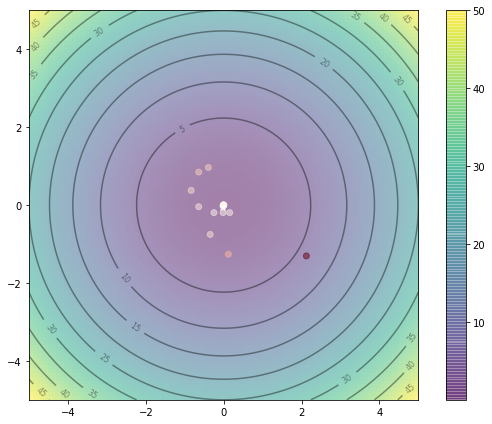

In [10]:
# apply objective function to entire plot
x, y = np.array(np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)))
z = objective([x, y])

# find global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# plot
fig, ax = plt.subplots(figsize = (8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[bounds[0][0], bounds[0][1], bounds[1][0], bounds[1][1]],
                 origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
c_plot = ax.scatter(b_candidates[0], b_candidates[1], marker='o', c=bc_scores, cmap='Reds', alpha=0.5)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

### Example 2

(-2.0, 2.0)

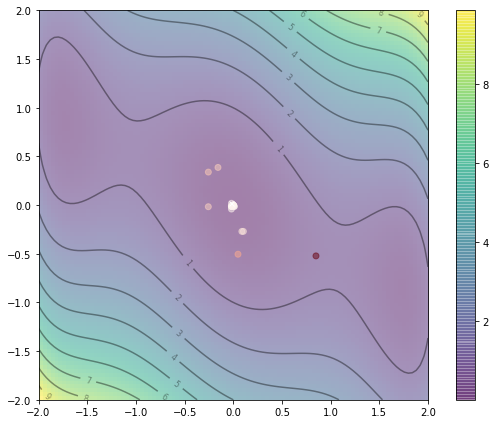

In [14]:
# apply objective function to entire plot
x, y = np.array(np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)))
z = g([x, y])

# find global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# plot
fig, ax = plt.subplots(figsize = (8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[bounds[0][0], bounds[0][1], bounds[1][0], bounds[1][1]],
                 origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
c_plot = ax.scatter(b_candidates[0], b_candidates[1], marker='o', c=bc_scores, cmap='Reds', alpha=0.5)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])